### Image Inpainting

In [1]:
import torch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from lib import *
from tensor_admm import tensor_admm

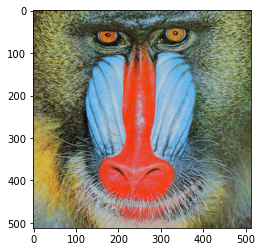

In [3]:
img = torch.from_numpy(np.array(Image.open('../test/mandril_color.tif'))).float()
img /= 255
plt.imshow(img)

In [4]:
# remove some point
sample_ratios = [0.3, 0.5, 0.7]
width, height, channel = img.size()

In [5]:
# parameters
max_iteration = 1000

In [6]:
Ts, samplings, errors, error_lists = [], [], [], []
for sample_ratio in sample_ratios:
    sampling_tensor = generate_sampling_tensor(width, height, channel, "inpainting", sample_ratio) 
    T, error, _, error_list = tensor_admm(
        T=img, 
        sampling_tensor=sampling_tensor, 
        proximal_type="TNN", 
        max_iteration=max_iteration
    )
    Ts.append(T)
    errors.append(error)
    samplings.append(T * sampling_tensor)
    error_lists.append(error_list)

100 tensor(0.2113)
200 tensor(0.2076)
300 tensor(0.2070)
400 tensor(0.2070)
500 tensor(0.2070)
600 tensor(0.2070)
700 tensor(0.2071)
800 tensor(0.2071)
900 tensor(0.2071)
1000 tensor(0.2071)
Iteration number is 1000
Recovery error is tensor(0.0027)
100 tensor(0.1657)
200 tensor(0.1580)
300 tensor(0.1570)
400 tensor(0.1569)
500 tensor(0.1569)
600 tensor(0.1570)
700 tensor(0.1570)
800 tensor(0.1570)
900 tensor(0.1571)
1000 tensor(0.1571)
Iteration number is 1000
Recovery error is tensor(0.0026)
100 tensor(0.1263)
200 tensor(0.1130)
300 tensor(0.1111)
400 tensor(0.1107)
500 tensor(0.1106)
600 tensor(0.1106)
700 tensor(0.1106)
800 tensor(0.1107)
900 tensor(0.1107)
1000 tensor(0.1108)
Iteration number is 1000
Recovery error is tensor(0.0027)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


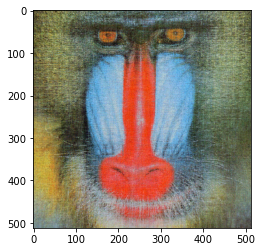

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


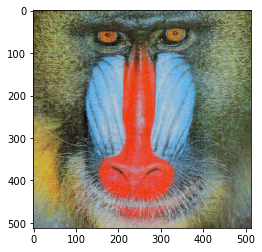

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


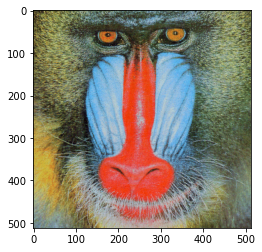

In [7]:
for T in Ts:
    plt.imshow(T.real)
    plt.show()

In [8]:
for i, T in enumerate(Ts):
    image2 = Image.fromarray(np.array(T * 255, dtype=np.uint8))
    image2.save(f"../results/TNN_ADMM_lena_result_{i}.eps")

for i, sampling in enumerate(samplings):
    image1 = Image.fromarray(np.array(sampling * 255, dtype=np.uint8))
    image1.save(f"../results/TNN_ADMM_lena_sampled_{i}.eps")


/Users/vince/opt/anaconda3/lib/python3.9/site-packages/torch/_tensor.py:753: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


In [9]:
torch.log10(1 / torch.tensor(errors)) * 20

tensor([13.6762, 16.0765, 19.1126])